In [17]:
 # Placement Prediction System
 import pandas as pd
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import LabelEncoder, StandardScaler
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.metrics import accuracy_score, classification_report
 import seaborn as sns
 import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement_data.csv')

In [3]:
df.head()

,Name,Tenth %,Twelfth %,FE %,SE %,TE %,Certifications,Projects,Internships,Placed
0,Siddharth M.,90.15,70.55,60.55,77.18,60.42,1,3,1,No
1,Pooja E.,66.30,81.12,70.13,86.67,77.29,4,2,1,Yes
2,Ravi I.,72.00,67.14,66.79,78.79,55.46,3,3,0,No
3,Rahul R.,93.95,82.69,76.33,74.51,86.25,4,4,0,No
4,Pooja U.,83.96,94.49,74.32,68.33,69.82,4,3,0,No


In [4]:
df.isnull().sum()

Name              0
Tenth %           0
Twelfth %         0
FE %              0
SE %              0
TE %              0
Certifications    0
Projects          0
Internships       0
Placed            0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
le = LabelEncoder()
df['Placed'] = le.fit_transform(df['Placed'])
df.head()

,Name,Tenth %,Twelfth %,FE %,SE %,TE %,Certifications,Projects,Internships,Placed
0,Siddharth M.,90.15,70.55,60.55,77.18,60.42,1,3,1,0
1,Pooja E.,66.30,81.12,70.13,86.67,77.29,4,2,1,1
2,Ravi I.,72.00,67.14,66.79,78.79,55.46,3,3,0,0
3,Rahul R.,93.95,82.69,76.33,74.51,86.25,4,4,0,0
4,Pooja U.,83.96,94.49,74.32,68.33,69.82,4,3,0,0


In [9]:
df.dtypes

Name               object
Tenth %           float64
Twelfth %         float64
FE %              float64
SE %              float64
TE %              float64
Certifications      int64
Projects            int64
Internships         int64
Placed              int64
dtype: object

In [10]:
df.columns

Index(['Name', 'Tenth %', 'Twelfth %', 'FE %', 'SE %', 'TE %',
       'Certifications', 'Projects', 'Internships', 'Placed'],
      dtype='object')

In [11]:
num_cols = ['Tenth %', 'Twelfth %', 'FE %', 'SE %', 'TE %']

In [12]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,Name,Tenth %,Twelfth %,FE %,SE %,TE %,Certifications,Projects,Internships,Placed
0,Siddharth M.,1.211810,-0.891212,-1.072647,0.386435,-1.113489,1,3,1,0
1,Pooja E.,-1.317566,0.233040,-0.166574,1.416855,0.699517,4,2,1,1
2,Ravi I.,-0.713061,-1.253909,-0.482470,0.561248,-1.646536,3,3,0,0
3,Rahul R.,1.614813,0.400030,0.419820,0.096527,1.662442,4,4,0,0
4,Pooja U.,0.555339,1.655109,0.229715,-0.574495,-0.103278,4,3,0,0


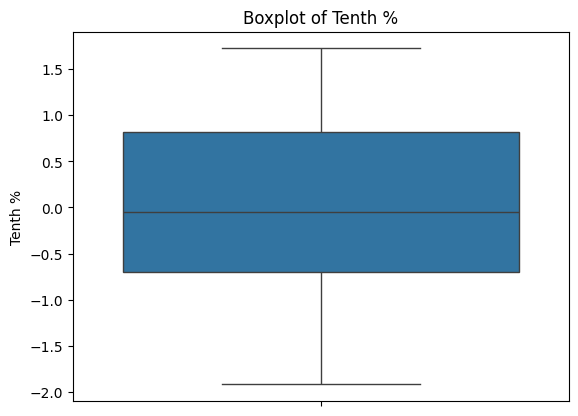

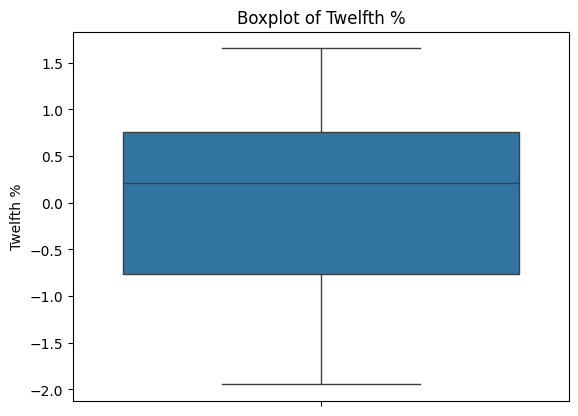

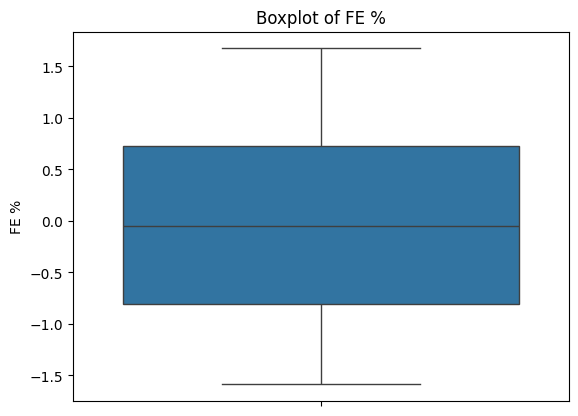

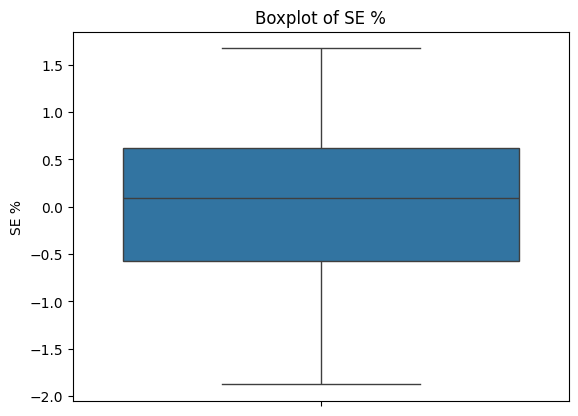

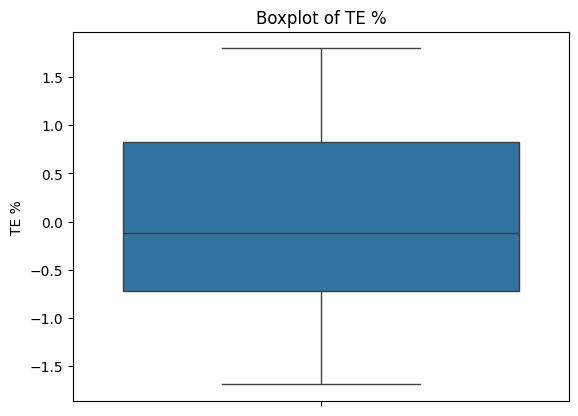

In [18]:
for col in num_cols:
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [19]:
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5 * iqr 
high = q3 + 1.5 * iqr
df = df[~( (df[num_cols] < low) | (df[num_cols] > high) ).any(axis=1) ]